<a href="https://colab.research.google.com/github/chwdoit/BigData/blob/main/%EC%95%84%EB%B3%B4%EC%B9%B4%EB%8F%84_%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from prophet import Prophet # fbprophet은 지원안하는 것으로 보임(파이썬 버전 영향)

In [ ]:
df = pd.read_csv('/content/avocado.csv') # https://www.kaggle.com/datasets/neuromusic/avocado-prices
df.head()
df.dtypes
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
pd.set_option('display.max_column', None) # 짤리는게 있는데 none으로 설정해놓으면 끝까지 다 볼 수 있음
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


##Preprocess

In [ ]:
df.groupby('type').mean() # 일반/유기농

<ipython-input-6-135805fb2b76>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('type').mean() # 일반/유기농


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [ ]:
df = df.loc[(df.type == 'conventional') & (df.region == 'TotalUS')] # location 인덱싱

df['Date'] = pd.to_datetime(df['Date']) # 시계열 타입으로 하려면 to date 타입으로 바꿔줘야 함

data = df[['Date', 'AveragePrice']].reset_index(drop=True)

data = data.rename(columns={'Date': 'ds', 'AveragePrice': 'y'}) # 닉네임 재설정 위에 형식이 있는데 이거는 그대로 따라가야 함

data.head()

,ds,y
0,2015-12-27,0.95
1,2015-12-20,0.98
2,2015-12-13,0.93
3,2015-12-06,0.89
4,2015-11-29,0.99


<Axes: xlabel='ds'>

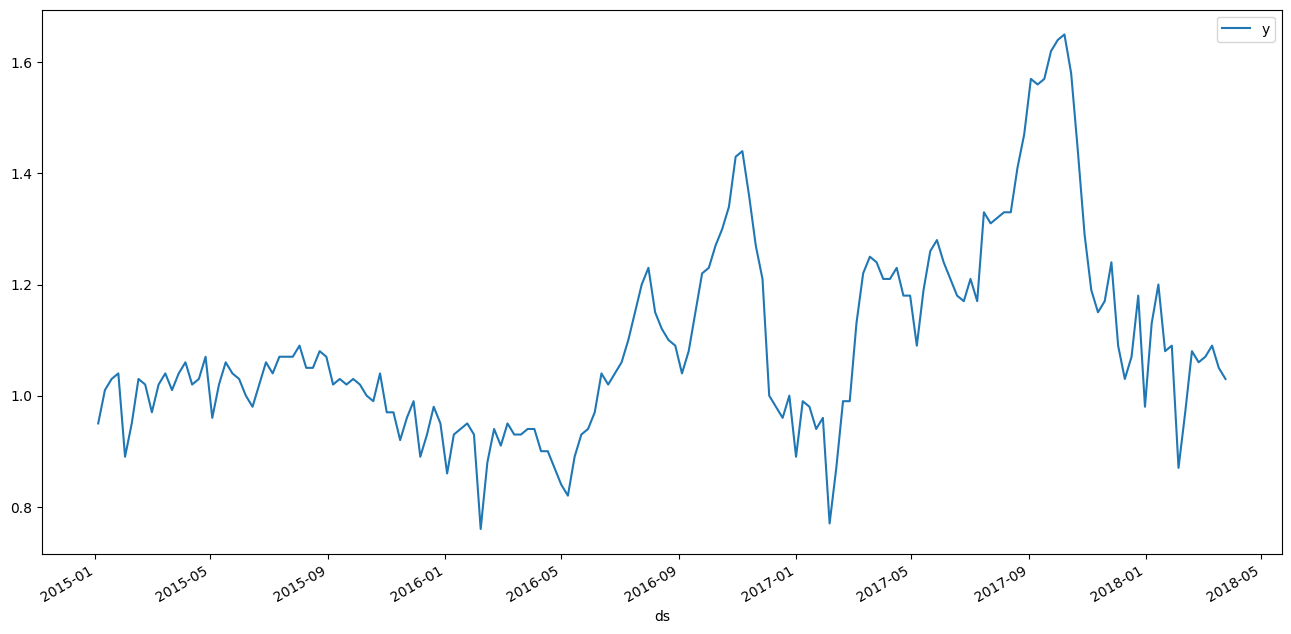

In [ ]:
data.plot(x='ds', y='y', figsize=(16, 8)) # 아보카도가 9월에서 1월 사이에 가격이 올랐다

##Model fit

In [ ]:
# https://facebook.github.io/prophet/docs/quick_start.html

model = Prophet()

model.fit(data) # 피팅(학습 포함)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk41uwtjn/bj8f2mhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk41uwtjn/9vblozdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79338', 'data', 'file=/tmp/tmpk41uwtjn/bj8f2mhj.json', 'init=/tmp/tmpk41uwtjn/9vblozdd.json', 'output', 'file=/tmp/tmpk41uwtjn/prophet_model6vdp2tux/prophet_model-20240315100710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:07:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:07:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Predict

In [ ]:
future = model.make_future_dataframe(periods=365) # 얼마만큼 돌릴것이냐

forecast = model.predict(future)

forecast.tail() # 마지막 꼬리 부분

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.198336,1.000584,1.269832,1.136423,1.262167,-0.061834,-0.061834,-0.061834,-0.061834,-0.061834,-0.061834,0.0,0.0,0.0,1.136502
530,2019-03-22,1.198273,1.013397,1.268929,1.136042,1.262362,-0.060328,-0.060328,-0.060328,-0.060328,-0.060328,-0.060328,0.0,0.0,0.0,1.137946
531,2019-03-23,1.198210,0.998799,1.262110,1.135661,1.262667,-0.058337,-0.058337,-0.058337,-0.058337,-0.058337,-0.058337,0.0,0.0,0.0,1.139874
532,2019-03-24,1.198147,1.015976,1.269838,1.135355,1.263014,-0.055877,-0.055877,-0.055877,-0.055877,-0.055877,-0.055877,0.0,0.0,0.0,1.142270
533,2019-03-25,1.198084,1.011473,1.274738,1.134876,1.263257,-0.052980,-0.052980,-0.052980,-0.052980,-0.052980,-0.052980,0.0,0.0,0.0,1.145104


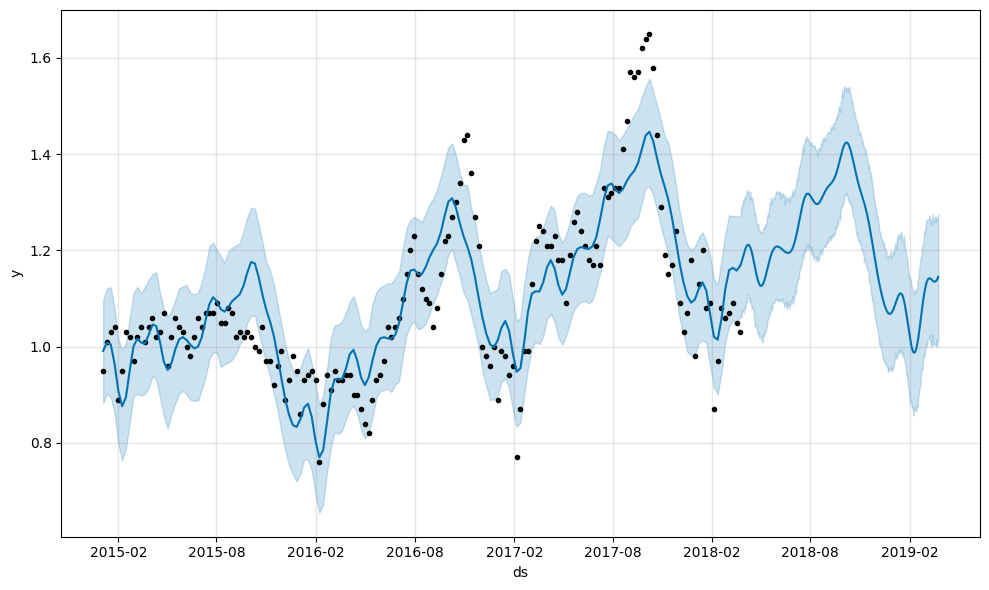

In [ ]:
fig1 = model.plot(forecast) # 점들은 실제값

##Components

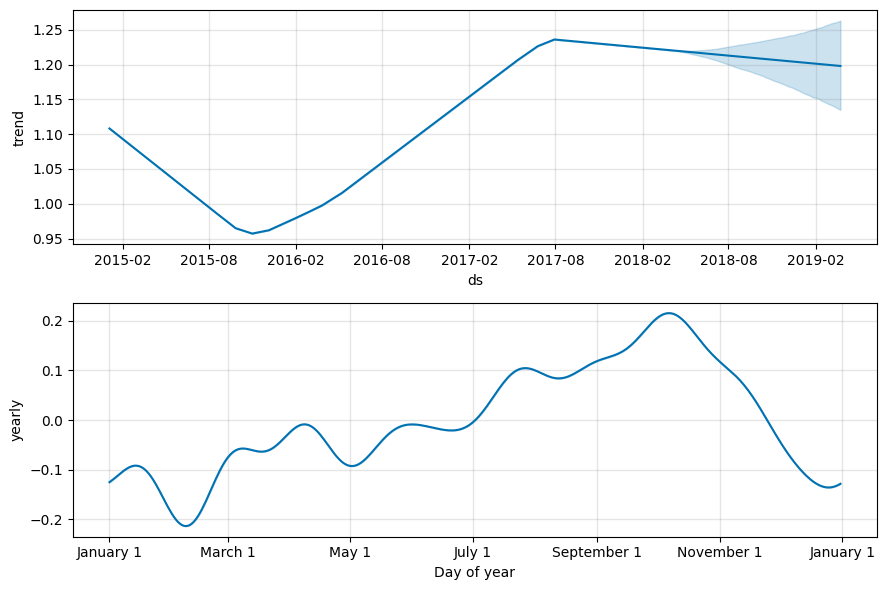

In [ ]:
fig2 = model.plot_components(forecast) # 영향 요소 분석(트렌드, 계절성)

##Practice

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk41uwtjn/tqcprtao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk41uwtjn/a7_l4zn4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77304', 'data', 'file=/tmp/tmpk41uwtjn/tqcprtao.json', 'init=/tmp/tmpk41uwtjn/a7_l4zn4.json', 'output', 'file=/tmp/tmpk41uwtjn/prophet_modelu7qptsat/prophet_model-20240315100722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:07:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:07:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds     y  sunday
0  2015-12-27  0.95       1
1  2015-12-20  0.98       1
2  2015-12-13  0.93       1
3  2015-12-06  0.89       1
4  2015-11-29  0.99       1
5  2015-11-22  0.96       1
6  2015-11-15  0.92       1
7  2015-11-08  0.97       1
8  2015-11-01  0.97       1
9  2015-10-25  1.04       1
10 2015-10-18  0.99       1
11 2015-10-11  1.00       1
12 2015-10-04  1.02       1
13 2015-09-27  1.03       1
14 2015-09-20  1.02       1
15 2015-09-13  1.03       1
16 2015-09-06  1.02       1
17 2015-08-30  1.07       0
18 2015-08-23  1.08       0
19 2015-08-16  1.05       0
20 2015-08-09  1.05       0
21 2015-08-02  1.09       0
22 2015-07-26  1.07       0
23 2015-07-19  1.07       0
24 2015-07-12  1.07       0
25 2015-07-05  1.04       0
26 2015-06-28  1.06       0
27 2015-06-21  1.02       0
28 2015-06-14  0.98       0
29 2015-06-07  1.00       0
30 2015-05-31  1.03       0
31 2015-05-24  1.04       0
32 2015-05-17  1.06       0
33 2015-05-10  1.02       0
34 2015-05-03  0.96 

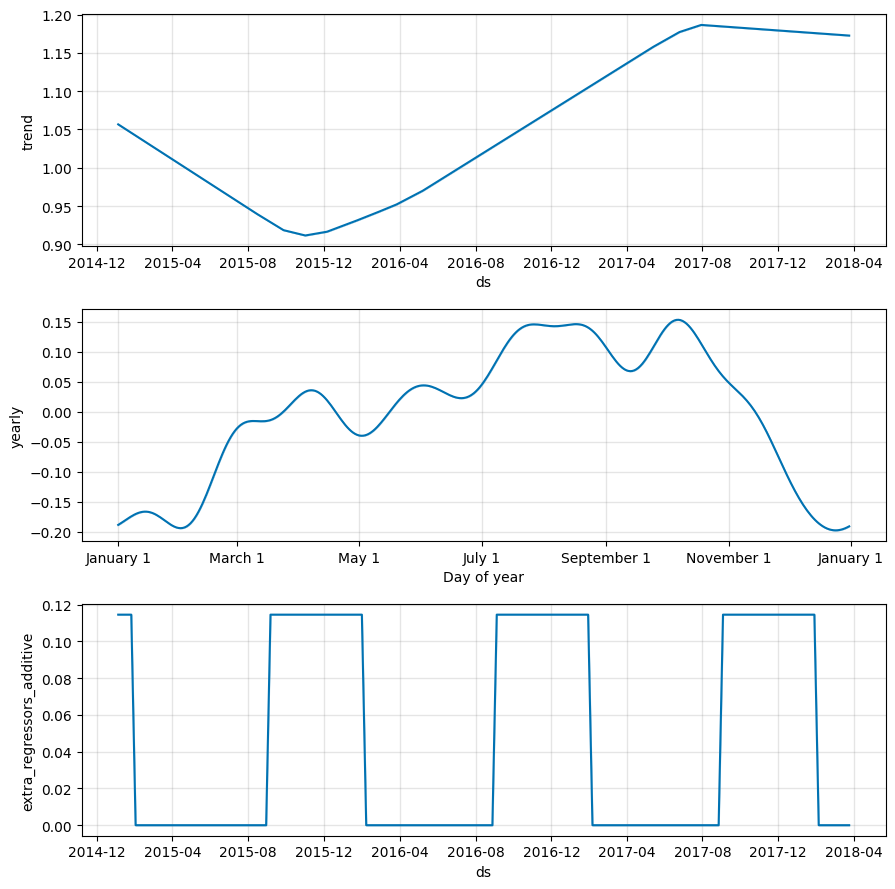

In [ ]:
def sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2): # raw 8, 2 # 9 ~ 1월
        return 1
    else:
        return 0
data['sunday'] = data['ds'].apply(sunday)
print(data.head(50))

m = Prophet()
m.add_regressor('sunday')
m.fit(data)

data['sunday'] = data['ds'].apply(sunday)
forecast = m.predict(data)
fig = m.plot_components(forecast) # 휴일보다 계절성에 대해서 더 민감하고 뚜렷하게 나타난다(계절성이 위와 차이가 좀 더 난다)